# Standard error, sampling distribution and CLT

### Before we begin...

<ul>
<li>
At certain points we create random samples from known distributions which we use to estimate the parameters of the distribution. This is not a contradiction but a convenience (no data / fair sampling)
</li>
<li>You may see some calls of <code>np.random.seed(...)</code>. In this way we secure that
    <ul>
    <li>the random samples will be the same for all users</li>
    <li>some extreme examples (rare values) can be reproduced</li>
    </ul>
</li>
<li>
We create random samples using the module <code>scipy.stats</code> instead of the more commonly used <code>random</code> and <code>numpy.random</code> for two reasons: (i) we were going to use <code>scipy.stats</code> anyway (PDFs, inverse functions, etc.) and, (ii) it provides a lot more distributions that the other modules.
</li>
</ul>

## Motivation for interval estimation

Two surveys are measuring the mean height of greeks in the age range 18-26 with sample size $N = 1000$. The <b>point estimate</b> of the population mean $\mu$ is the sample mean:

$$\bar{x} = \frac{1}{N} \sum\limits_{i=1}^{N} x_i$$

which is the unbiased estimator of the population mean:

$$E\left(\bar{x}\right) = \mu$$

The results could be:

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

height_distribution = st.norm(178.06, 7.05)    # create a normal distribution

N = 1000
survey1 = height_distribution.rvs(size = N)    # create N "random variates" ~ dist
survey2 = height_distribution.rvs(size = N)    # another sample

print("Survey 1: ", np.mean(survey1), " |  Survey 2: ", np.mean(survey2))

('Survey 1: ', 178.1897450666012, ' |  Survey 2: ', 178.09932395017239)


The results <b>always</b> differ - any new sample will produce a different estimate for the mean. <font color=red>How can we compare surveys, or refer to mean values with an estimate of their uncertainty?</font>

## Sampling distribution

The population mean is <b>fixed</b> but the sample mean is a <b>random variable</b> having its own distribution. As it is <font color="red">produced by the process of sampling</font>, it is called the <b>sampling distribution</b> of the sample mean.

A way of describing the variability in a set of observations, is the sample standard deviation $s$:

$$ s^2 = \frac{1}{N-1} \sum\limits_{i=1}^{N} \left(x_i - \bar{x}\right)^2 $$

which is the unbiased estimator of the population standard deviation $\sigma$ (Bessel's correction):

$$E\left(s\right) = \sigma$$

### Example

Let's see how the sampling distribution of the sample mean looks like by plotting the histogram of $M = 1000$ samples with size $N = 100$.

Simultaneously, we can compute the number of times the true mean lies in the range $(m - k s, m + k s)$ where $m, s$ are the mean and std. dev. of the sampling distribution, for $k = 1, 2, 3$.

('One sample   (m , s) = (', 177.88, ',', 6.31, ')')
('Sampl. dist. (m , s) = (', 178.06, ',', 0.71, ')')
('in', 1, 'sigma', 68.35, '%  ')
('in', 2, 'sigmas', 95.32, '%  ')
('in', 3, 'sigmas', 99.72, '%  ')


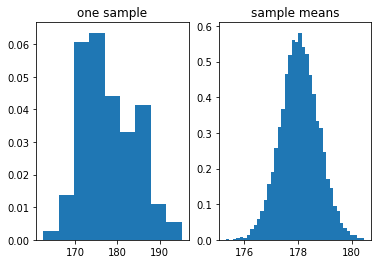

In [2]:
N = 100                 # size of each sample
M = 10000               # number of samples

np.random.seed(2017)

# Create one sample
one_sample = height_distribution.rvs(size = N)
m = np.mean(one_sample)
s = np.std(one_sample)
print("One sample   (m , s) = (", round(m, 2), ",", round(s, 2), ")")

# Repeate M times: create sample, compute its mean. Store the results in the list 'sample_means'
sample_means = [np.mean(height_distribution.rvs(N)) for i in range(M)]

sd_m = np.mean(sample_means)    # sampling distribution's sample mean
sd_s = np.std(sample_means)     # sampling distribution's sample standard deviation
print("Sampl. dist. (m , s) = (", round(sd_m, 2), ",", round(sd_s, 2), ")")
# Check percentages for various sigma-levels
for sigma_level in range(1, 4):
    count = 0
    for sample_mean in sample_means:
        if (abs(sample_mean - height_distribution.mean())) / sd_s < sigma_level:
            count += 1
    print("in", sigma_level, "sigma" + ("s" if sigma_level > 1 else ""), \
          (100.0 * count) / M, "%  ")

# Plot results
plt.subplot(1, 2, 1)
plt.hist(one_sample, bins = 9, normed = True)
plt.title("one sample")
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins = 40, normed = True)
plt.title("sample means")
plt.show()

## Standard error: meaning and purpose

The previous example's sample means typically deviate about $0.7$. This is an estimate of the uncertainty on the sample mean. The standard deviation of a statistic's sampling distribution is called <b>standard error</b> of that statistic.

With real data we do not have access to many samples or directly to the sampling distribution of the mean. <b>If</b> we knew  the standard deviation of the sampling distribution, we could say...

<i>The sample mean is $177.88 \pm 0.71$ at a $68\%$ confidence level</i>

or

<i>The sample mean is in the interval $(177.17, 178.59)$ at a $68\%$ confidence level</i>


## Central Limit Theorem

The bell-shape of the sampling distribution is not coincidental, neither the percentages we found: they're a great example of the <i>Central Limit Theorem</i> (CLT) which states that:

<i>
the sum of $N$ independent and identically distributed (i.i.d.) random variables tends to the normal distribution as
$N \rightarrow \infty$.
</i>

According to the CLT, the <i>standard error of the mean</i> (SEM) of an $N$-sized sample from a population with standard deviation $\sigma$ is:

$$SE(\bar{x}) = \frac{\sigma}{\sqrt{N}}$$

If we apply it for $N = 100$ and $\sigma = 7.05$ we get the value $0.705$, an estimate of which was found in the previous example. When the standard deviation of the population is <b>unknown</b> (the usual case) it can be approximated by the sample standard deviation $s$:

$$SE(\bar{x}) = \frac{s}{\sqrt{N}}$$

### The 68 - 95 - 99.7 rule

The CLT explains the percentages the previous code block returns. These are approximately the areas of the PDF of the normal distribution in the ranges $\left(\mu - k\sigma, \mu + k\sigma\right)$ for $k = 1, 2, 3$.

### Example

Let's confirm the rule using Python...

('For', 1, 'sigma the area of the PDF is ~', 0.683)
('For', 2, 'sigma the area of the PDF is ~', 0.954)
('For', 3, 'sigma the area of the PDF is ~', 0.997)

('For', 0.68, '% coverage, the interval is', array([-0.994,  0.994]))
('For', 0.95, '% coverage, the interval is', array([-1.96,  1.96]))
('For', 0.997, '% coverage, the interval is', array([-2.968,  2.968]))


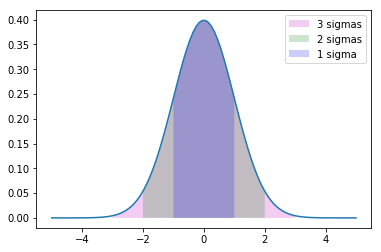

In [3]:
sigmas = [1, 2, 3]
for sigma in sigmas:
    print("For", sigma, "sigma the area of the PDF is ~", round(st.norm.cdf(sigma) - st.norm.cdf(-sigma), 3))
    
print("")

percentages = [0.68, 0.95, 0.997]
for percentage in percentages:
    print("For", percentage, "% coverage, the interval is", np.round(st.norm.interval(percentage), 3))

def plotsigma(s, c):
    x = np.linspace(-s, s, 100)
    y1 = st.norm.pdf(x)
    y2 = [0] * 100
    text = str(s) + " sigma" + ("s" if abs(s) != 1 else "")
    plt.fill_between(x, y1, y2, facecolor = c, label = text, alpha = 0.2)
    
x = np.linspace(-5, 5, 100)
plt.plot(x, st.norm.pdf(x))
plotsigma(3, "m")
plotsigma(2, "g")
plotsigma(1, "b")
plt.legend()
plt.show()

## Standard error of the mean from one sample

In real-life applications, we have no access to the sampling distribution. Instead, we get <b>one sample</b> of observations and therefore <b>one point estimate per statistic</b> (e.g. mean and standard deviation.)

### Assuming normality

When $\sigma$ is known, then for various sigma levels $k$:

$$\bar{x} \pm k \frac{\sigma}{\sqrt{N}} \qquad \equiv \qquad \bar{x} \pm k \times SE\left(\bar{x}\right)$$

which correspond to confidence levels equal to the area of the standard normal distribution between values $\left(-k, k\right)$:

$$ C = Pr(-k < z < k) \Longrightarrow C = \Phi(k) - \Phi(-k)$$

where $z \sim \mathcal{N}\left(0, 1\right)$ and $\Phi(z)$ is the CDF of standard normal distribution.

### Assuming normality: t-Student approximation

When $\sigma$ is unknown, then the uncertainty of $s$ should be accounted for using the <b>Student's t approximation</b>. For large samples ($N > 30$) this is not necessary as the t-distribution is well approximated by normal distribution. If we decide to use it, then for the sample mean the following formula holds:

$$\bar{x} \pm t_c\left(\frac{a}{2}, N-1\right) \frac{s}{\sqrt{N}} \qquad \equiv \qquad \bar{x} \pm t_c \times SE\left(\bar{x}\right)$$

where $N$ is the sample size and $t_c$ is a critical value that depends on the requested significance level $a$ or equivalently the confidence level $C = 1-a$, and the degrees of freedom (here $N-1$):

$$Pr(-t_c < t < t_c) = 1 - a = C$$

The critical value is actually the inverse CDF of the $t$-distribution with $N-1$ d.o.f., evaluated at $\frac{a}{2}$.

### A common misconception...

The probability of the true parameter to lie inside the confidence interval produced from a sample is <b>not</b> equal to $68\%$: <b>it either contains it or not</b>.

Instead, $68\%$ is the probability for a sample from the same distribution and under the same circumstances, to produce a confidence interval containing the true mean. E.g. out of 1000 samples we expect that $\approx 680$ of the $1\sigma$ CIs will contain the sample mean.

## Numerical experiment: t-Student approximation

With the following experiment we will measure the frequency at which the two CIs (normal and t-student) contain the true mean.


In [4]:
# parameters of the experiment
N = 10                    # sample size
M = 1000                  # number of experiments
confidence_level = 0.90   # requested confidence level

count_n = 0    # of times the "normal" interval encloses the true mean
count_t = 0    # of times the "Student's" interval encloses the true mean

for run in range(M):
    sample = height_distribution.rvs(size = N)
    mean, SE_mean = np.mean(sample), st.sem(sample)    
    
    CI_n1, CI_n2 = st.norm.interval(confidence_level, loc = mean, scale = SE_mean)
    CI_t1, CI_t2 = st.t.interval(confidence_level, df = N - 1, loc = mean, scale = SE_mean)
    
    if CI_n1 < height_distribution.mean() and CI_n2 > height_distribution.mean(): count_n += 1
    if CI_t1 < height_distribution.mean() and CI_t2 > height_distribution.mean(): count_t += 1

print("Confidence level             :", confidence_level)
print("Using normal distribution    :", round(count_n / float(M), 3))
print("Using Student-t distribution :", round(count_t / float(M), 3))

('Confidence level             :', 0.9)
('Using normal distribution    :', 0.875)
('Using Student-t distribution :', 0.909)


## Central "Limitations"
Standard error is <b>not the only way</b> to get an interval estimate on the mean. Also:
<ul>
<li> <b>we cannot</b> use CLT for all parameters, samples or distributions </li>
<li>for other statistics, like <b>median</b> or <b>excess kurtosis</b>, analytical expressions exist for only a handful of distributions </li>
<li> sometimes we use custom-made distributions or statistics</li>
</ul>

### Thought experiment
If the distribution of our observed quantity is defined for $x > 0$ then both the true and the sample mean will be positive ($\mu, \bar{x} > 0$.) With a Guassian sampling distribution there would be a non-zero probability to get a negative sample mean!

### Numerical example
By (un)commenting the appropriate lines of the following code block, plot the sampling distribution of the sample mean of various distributions.

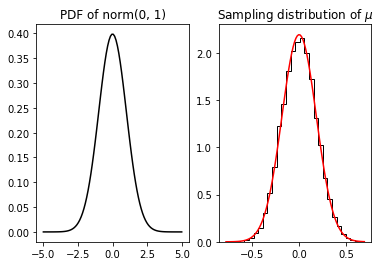

In [5]:
N = 30

dist = st.norm(0, 1)
#dist = st.uniform(-1, 2)
#dist = st.dweibull(8.5)
#dist = st.expon(1.0)
#dist = st.lognorm(1.5, 0.5)
#dist = st.beta(0.01, 10)

sample_means = [np.mean(dist.rvs(size = N)) for i in range(10000)]
gaussfit = st.norm(np.mean(sample_means), np.std(sample_means))
pdf_x = np.linspace(dist.mean() - 5 * dist.std(), dist.mean() + 5 * dist.std(), 100)
pdf_y = dist.pdf(pdf_x)

plt.subplot(1, 2, 1)
plt.plot(pdf_x, pdf_y, "k-")
plt.title("PDF of " + dist.dist.name + "(" + ", ".join(map(str, dist.args)) + ")")
plt.subplot(1, 2, 2)
plt.title("Sampling distribution of $\mu$")
x = np.linspace(min(sample_means), max(sample_means), 100)
plt.plot(x, gaussfit.pdf(x), "r-")
plt.hist(sample_means, 30, normed = True, histtype = "step", color = "k")
plt.show()

# Confidence intervals

<ul>
    <li>
    A <i><b>confidence interval</b></i> is an estimate of the range of a parameter of a population (in contrast to point estimates.)
    </li>
    <li>
    <i><b>Condifence interval</b></i> is an interval with random endpoints which contains the parameter of interest with a specified probability $C$ called <i>confidence level
    </i></li>
</ul>

It is closely related to <i>hypothesis testing</i>: confidence level is the complement of significance level: $C = 1 - a$.


## Parametric

If the sampling distribution is either known or assumed (e.g. normal from CLT), then deriving the interval at a confidence level $C$ is straightforward:
<ul>
    <li>each endpoint corresponds to a value for the CDF: $p_1 = \frac{1 - C}{2}$ and $p_2 = \frac{1 + C}{2}$</li>
    <li>find the percentiles $x_1$, $x_2$: the values for which $F(x_i) = p_i \Longrightarrow x_i = F^{-1}(p_i)$ where $F(x)$ is the CDF of the samlping distribution.
    <li>the confidence interval is $(x_1, x_2)$</li>
    <li>if $\hat{x}$ is the point estimate of the parameter of interest then we can write down all three values in the format: $\hat{x}_{x_1 - \hat{x}}^{x_2 - \hat{x}}$. Also, we shall <b>always</b> state the confidence level.
</ul>

### Confidence bounds

Similarily, we can get <b>one-sided</b> limits. At a confidence level $C$ the lower/upper confidence bounds from a distribution with CDF $F(x)$ are:

<ul>
<li> upper: $F^{-1}(C)$ corresponding to the interval $\left[F^{-1}(0), \, F^{-1}(C)\right]$ </li>
<li> lower: $F^{-1}(1-C)$ corresponding to the interval $\left[F^{-1}(1-C), \, F^{-1}(1)\right]$ </li>
</ul>

For example, if $F(x)$ is the CDF of the standard normal distribution, then $F(-1) \approx 0.16$ and $F(1) \approx 0.84$. Therefore:

<ul>
<li>$1$ is the upper $84\%$ confidence bound</li>
<li>$-1$ is the lower $84\%$ confidence bound</li>
</ul>

### Example

Let's assume that we did the math and found that the sampling distribution of our parameter is the <i>exponential power distribution</i> with shape parameter $b = 3.8$. Then the confidence intervals at various levels would be assymetric:

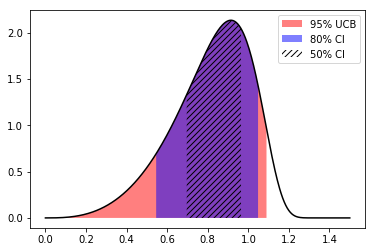

In [6]:
dist = st.exponpow(3.8)
ci68 = dist.interval(0.5)             # using .interval() method
ci80 = [dist.ppf(0.1), dist.ppf(0.9)] # ...or using percentile point function
cb95 = [dist.ppf(0), dist.ppf(0.95)]  # ...which is handy for one-sided intervals

x = np.linspace(0, 1.5, 400)
y = dist.pdf(x)
x68 = np.linspace(ci68[0], ci68[1]); y68 = dist.pdf(x68)
x80 = np.linspace(ci80[0], ci80[1]); y80 = dist.pdf(x80)
x95 = np.linspace(cb95[0], cb95[1]); y95 = dist.pdf(x95)
plt.plot(x, y, "k-")
plt.fill_between(x95, y95, 0 * y95, alpha = 0.5, label = "95% UCB", facecolor = "r")
plt.fill_between(x80, y80, 0 * y80, alpha = 0.5, label = "80% CI", facecolor = "b")
plt.fill_between(x68, y68, 0 * y68, alpha = 0.0, label = "50% CI", hatch = "////")
plt.legend()
plt.show()

## Non-parametric

For the sample mean, the standard error is well defined and performs quite well for most cases. Though, we may want to compute the standard error of other parameters for which the sampling distribution is either <b>unknown</b> or <b>difficult to compute</b>.

For example, the standard error of the median and skewness for normal distributed samples are:

$$ SE_m = \sqrt{\frac{\pi}{2}} \frac{\sigma}{\sqrt{N}} $$

$$ SE_{sk} = \sqrt{\frac{6N\left(N-1\right)}{\left(N+1\right)\left(N-2\right)\left(N+3\right)}} $$

where $\sigma$ is the standard deviation of the underlying distribution and $N$ is the size of the sample. Though, these formul&aelig; do not hold for distributions that are very different from the Gaussian.

There are various methods for the <b>non-parametric</b> estimation of the standard error / confidence interval. <font color="red"> Though, one should be careful with the <b>assumptions</b> of the non-parametric methods or perform numerical experiments to confirm the validity of their application on a given sample</font>.

Here we will see two such methods: <b>bootstrap</b> and <b>jackknife</b>.

### Bootstrap

Bootsrapping is a resampling (with replacement) method. As we saw before, by drawing many samples we can approximate the sampling distribution of the mean which is impossible for real data without the assumption of a distribution.

Bootstrap method is based on randomly constructing $B$ samples from the original one, by sampling with replacement from the latter. The size of the resamples should be equal to the size of the original sample. For example, with the sample $X$ below, we can create $B = 5$ new samples $Y_i$:

$$X = \left[1, 8, 3, 4, 7\right]$$

$$\begin{align}
Y_1 &= \left[8, 3, 3, 7, 1\right] \\
Y_2 &= \left[3, 1, 4, 4, 1\right] \\
Y_3 &= \left[3, 7, 1, 8, 7\right] \\
Y_4 &= \left[7, 7, 4, 3, 1\right] \\
Y_5 &= \left[1, 7, 8, 3, 4\right]
\end{align}$$

Then, we compute the desired sample statistic for each of those samples to form an empirical sampling distribution. The standard deviation of the $B$ sample statistics is the bootstrap estimate of the standard error of the statistic.

#### Example: SE of median and skewness

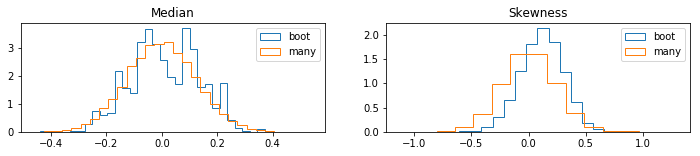

('SE median (if normal)   :', 0.12533141373155002)
('SE median (bootstrap)   :', 0.12316728399371052)
('SE median (many samples):', 0.12335072266337349)
-----------------------------------------
('SE skewness (if normal)   :', 0.0)
('SE skewness (bootstrap)   :', 0.18896860314784134)
('SE skewness (many samples):', 0.23591151678459191)


In [9]:
N = 100   # size of sample
M = 10000 # of samples
B = M     # of bootstrap resample

dist = st.norm(0, 1)
#dist = st.uniform(0, 1)
#dist = st.cauchy()
#dist = st.dweibull(8.5)

sample = dist.rvs(N)
many_samples = dist.rvs([M, N])
boot_samples = np.random.choice(sample, (B, N), replace = True)

m_boot = np.median(boot_samples, axis = 1)
m_many = np.median(many_samples, axis = 1)
s_boot = st.skew(boot_samples, axis = 1)
s_many = st.skew(many_samples, axis = 1)
m_norm = np.sqrt(np.pi / (2.0 * N)) * dist.std()
s_norm = np.sqrt(6 * N * (N - 1) / ((N + 1) * (N - 2) * (N + 3)))

plt.figure(figsize = [12, 2])
plt.subplot(1, 2, 1)
plt.hist(m_boot, 30, histtype = "step", normed = True, label = "boot")
plt.hist(m_many, 30, histtype = "step", normed = True, label = "many")
plt.title("Median")
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(s_boot, 15, histtype = "step", normed = True, label = "boot")
plt.hist(s_many, 15, histtype = "step", normed = True, label = "many")
plt.title("Skewness")
plt.legend()
plt.show()

print("SE median (if normal)   :", m_norm)
print("SE median (bootstrap)   :", np.std(m_boot))
print("SE median (many samples):", np.std(m_many))
print("-----------------------------------------")
print("SE skewness (if normal)   :", s_norm)
print("SE skewness (bootstrap)   :", np.std(s_boot))
print("SE skewness (many samples):", np.std(s_many))

### Jackknife resampling

This older method inspired the Bootstrap which can be seen as a generalization (Jackknife is the linear approximation of Bootstrap.) It estimates the sampling distribution of a parameter on an $N$-sized sample through a collection of $N$ sub-samples by removing one element at a time.

E.g. the sample $X$ leads to the <b>Jackknife samples</b> $Y_i$:

$$ X = \left[1, 7, 3\right] $$

$$
\begin{align}
Y_1 &= \left[7, 3\right] \\
Y_2 &= \left[1, 3\right] \\
Y_3 &= \left[1, 7\right]
\end{align}
$$

The <b>Jackknife Replicate</b> $\hat\theta_{\left(i\right)}$ is the value of the estimator of interest $f(x)$ (e.g. mean, median, skewness) for the $i$-th subsample and $\hat\theta_{\left(\cdot\right)}$ is the sample mean of all replicates:

$$
\begin{align}
\hat\theta_{\left(i\right)} &= f\left(Y_i\right) \\
\hat\theta_{\left(\cdot\right)} &= \frac{1}{N}\sum\limits_{i=1}^N {\hat\theta_{\left(i\right)}}
\end{align}
$$

and the <b>Jackknife Standard Error</b> of $\hat\theta$ is computed using the formula:
 
$$ SE_{jack}(\hat\theta) = \sqrt{\frac{N-1}{N}\sum\limits_{i=1}^N \left[\hat{\theta}\left(Y_i\right) - \hat\theta_{\left(\cdot\right)} \right]^2} = \cdots = \frac{N-1}{\sqrt{N}} s$$

where $s$ is the standard deviation of the replicates.

#### Example: estimation of the standard error of the mean

In [10]:
N = 100
M = N

#dist = st.norm(0, 1)
dist = st.uniform(0, 1)
#dist = st.cauchy()
#dist = st.dweibull(8.5)

def jackknife(x):
    return [[x[j] for j in range(len(x)) if j != i] for i in range(len(x))]
    

sample = dist.rvs(N)
many_samples = dist.rvs([M, N])
jack_samples = jackknife(sample)

jack_means = np.mean(jack_samples, axis = 1)
many_means = np.mean(many_samples, axis = 1)
jack_medians = st.kurtosis(jack_samples, axis = 1)
many_medians = st.kurtosis(many_samples, axis = 1)
SE_mean_jack = np.std(jack_means) * (N - 1.0) / np.sqrt(N)
SE_mean_many = np.std(many_means)
SE_median_jack = np.std(jack_medians) * (N - 1.0) / np.sqrt(N)
SE_median_many = np.std(many_medians)
SE_clt = np.std(sample) / np.sqrt(N)

print("[ Standard error of the mean ]")
print("    SEM formula  :", SE_clt)
print("    Jackknife    :", SE_mean_jack)
print("    Many samples :", SE_mean_many)
print("\n[Standard error of the median ]")
print("    Jackknife    :", SE_median_jack)
print("    Many samples :", SE_median_many)

[ Standard error of the mean ]
('    SEM formula  :', 0.028548498130056898)
('    Jackknife    :', 0.02854849813005687)
('    Many samples :', 0.029109200403751642)

[Standard error of the median ]
('    Jackknife    :', 0.18270943142822429)
('    Many samples :', 0.12544036619462162)


# Propogation of Uncertainty

Let's very briefly introduce the general cases, for completeness. This will be followed by the specific case used typically by engineers and physical scientists, which is perhaps of most interest to us.

## Linear Combinations
For $\big\{{f_k(x_1,x_2,\dots,x_n)}\big\}$, a set of $m$ functions that are linear combinations of $n$ variables $x_1,x_2,\dots,x_3$ with combination coefficients $A_{k1},A_{k2},\dots,A_{kn},k=1 \dots m$.

$\large{f_k=\sum\limits_{i=1}^{n} A_{ki}x_i}$ or $\large{f=Ax}$

From here, we would formally write out the $\textbf{variance-covariance matrix}$, which deals with the correlation of uncertainties across variables and functions, and contains many $\sigma$'s. Each covariance term $\sigma_{ij}$ may be expressed in terms of a $\textbf{correlation coefficient}$ $\rho_{ij}$ as $\sigma_{ij}=\rho_{ij}\sigma_{i}\sigma_{j}$.

In our most typical case, where variables are uncorrelated, the entire matrix may be reduced to:

$\large{\sigma^{2}_{f} = \sum\limits_{i=1}^{n} a^{2}_{i}\sigma^{2}_{i}}$

This form will be seen in the most likely applicable case for astronomers below.

## Non-linear Combinations

When $f$ is a non-linear combination of the variables $x$, $f$ must usually be linearized by approximation to a first-order Taylor series expansion:

$\large{f_k=f^{0}_{k}+\sum\limits^{n}_{i} \frac{\partial f_k}{\partial x_i} x_i}$

where $\large{\frac{\partial f_k}{\partial x_i}}$ denotes the partial derivative of $f_k$ with respect to the $i$-th variable.

### Simplification

If we neglect correlations, or assume the variables are independent, we get the commonly used formula for analytical expressions:

$\large{\sigma^{2}_{f}=\big(\frac{\partial f}{\partial x}\big)^{2}\sigma^{2}_{x}+\big(\frac{\partial f}{\partial y}\big)^{2}\sigma^{2}_{y}+\dots}$

where $\sigma_f$ is the standard deviation of the function $f$, with $\sigma_x$ being the standard deviation of the variable $x$ and so on.

This formula is based on the assumption of the linear characteristics of the gradient of $f$, and is therefore only a good estimation as long as the standard deviations are small compared to the partial derivatives.

### Example: Mass Ratio

The mass ratio for a binary system may be expressed as:

$\large{q=\frac{K_1}{K_2}=\frac{M_2}{M_1}}$

where K's denote the velocity semiamplitudes (from a Keplerian fit to the radial velocities) and M's represent the individual component masses.

Inserting this into the formula gives:

$\large{\sigma^{2}_{q}=\big(\frac{\partial q}{\partial K_1}\big)^{2}\sigma^{2}_{K_1}+\big(\frac{\partial q}{\partial K_2}\big)^{2}\sigma^{2}_{K_2}}$

$\large{\sigma^{2}_{q}=\big(\frac{1}{K_2}\big)^{2}\sigma^{2}_{K_1}+\big(\frac{K_1}{K_2^2}\big)^{2}\sigma^{2}_{K_2}}$

For a simple application of such a case, let's use the values of velocity semiamplitudes for the early-type B binary HD 42401 from Williams (2009):

$K_1=151.4\pm0.3$ km s$^{-1}$

$K_2=217.9\pm1.0$ km s$^{-1}$

Inserting these into the equations and computing the value, we get:

$q=0.6948\pm0.0038$

## Monte Carlo sampling

An uncertainty $\sigma_x$ expressed as a standard error of the quantity $x$ implies that we could treat the latter as a normally distributed random variable: $X \sim \mathcal{N}\left(x, \sigma_x^2\right)$. By sampling $M$ times each variable $x_i$ and computing $f$ we are experimentaly exploring the different outcomes $f$ could give.

## Example

The following code computes the mass ratio for HD 42401 and its uncertainty using uncertainty propagation and Monte Carlo sampling. For better comparison, we print 6 digits after decimal point.

('From error propagation formula: q =', 0.694814, '+/-', 0.003473)
('From monte carlo samlping:      q =', 0.694767, '+/-', 0.003455)


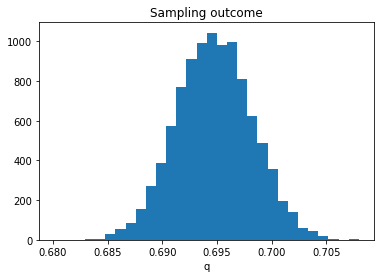

In [11]:
# observed quantities
K1 = 151.4
K2 = 217.9
K1_err = 0.3
K2_err = 1.0

# uncertainty propagation
q = round(K1 / K2, 6)
q_err = round(np.sqrt((K1_err / K2) ** 2.0 + (K2_err * K1 / K2 ** 2.0) ** 2.0), 6)

# Monte Carlo sampling
N = 10000
K1_sample = st.norm.rvs(K1, K1_err, N)
K2_sample = st.norm.rvs(K2, K2_err, N)
q_sample = K1_sample / K2_sample
q_mean = round(np.mean(q_sample), 6)
q_std = round(np.std(q_sample), 6)
q_CI95 = np.percentile(q_sample, [0.025, 0.975])
print("From error propagation formula: q =", q, "+/-", q_err)
print("From monte carlo samlping:      q =", q_mean, "+/-", q_std)
plt.hist(q_sample, 30)
plt.title("Sampling outcome")
plt.xlabel("q")
plt.show()

## Why bother with sampling?

Estimates of the true distance modulus and the radial velocity of NGC 2544 are (unpublished galaxy catalog):

$$
\begin{align}
(m - M)_0 &= 33.2 \pm 0.5 \\
v &= \left(3608 \pm 271\right) \text{km/s}
\end{align}
$$

Applying the Hubble's Law for this object leads to the following formul&aelig; and values:

$$
\begin{align}
H_0 &= \frac{v}{r} = \frac{v}{10^{0.2 m - 5}} = 82.7 \, \text{km}\,\text{s}^{-1}\,\text{Mpc}^{-1}\\
\sigma_{H_0}^2 &= \left(\frac{1}{10^{0.2 m - 5}}\right)^2\left[\sigma_v^2 + \left(\frac{\ln{10}}{5}v \times \sigma_m \right)^2\right] = 20.0 \, \text{km}\,\text{s}^{-1}\,\text{Mpc}^{-1}
\end{align}
$$

But can we trust the uncertainty propagation formula for distance moduli? Due to the <b>logarithmic nature</b> of distance modulus, a change by $\Delta\left(m-M\right)_0$ translates into multiplying/dividing the distance by a value close to $1$. Let alone, distance is always positive.

Applying the uncertainty propagation formula and the sampling method we get:

('Unc. prop.  : H0 =', 82.655, '+/-', 20.019)
('Monte Carlo : H0 =', 84.81, '+/-', 20.802)


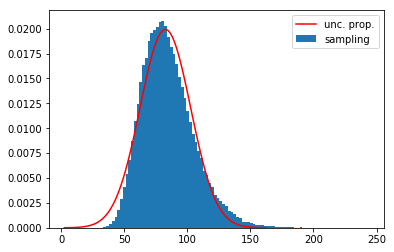

In [12]:
m = 33.2
m_err = 0.5
v = 3608
v_err = 271

H0 = v / 10.0 ** (0.2 * m - 5.0)
H0_err = np.sqrt(v_err ** 2.0 + (np.log(10.0) / 5.0 * v * m_err) ** 2.0) / 10.0 ** (0.2 * m - 5.0)
print("Unc. prop.  : H0 =", round(H0, 3), "+/-", round(H0_err, 3))

N = 100000
m_sample = st.norm.rvs(m, m_err, N)
v_sample = st.norm.rvs(v, v_err, N)
H0_sample = v_sample / (10.0 ** (0.2 * m_sample - 5.0))
H0_mean = np.mean(H0_sample)
print("Monte Carlo : H0 =", round(H0_mean, 3), "+/-", round(np.std(H0_sample), 3))
plt.hist(H0_sample, 100, normed = True, label = "sampling")
x = np.linspace(H0 - 4 * H0_err, H0 + 4 * H0_err, 100)
plt.plot(x, st.norm.pdf(x, H0, H0_err), "r-", label = "unc. prop.")
plt.legend()
plt.show()

# References

<ol>
<li><b>Bradley Harding, Christophe Tremblay & Denis Cousineau (2014) </b>. <i>Standard errors: A review and evaluation of standard error  estimators using Monte Carlo simulations.</i> The Quantitative Methods for Psychology. vol.10, no.2.</li>
<li><b>Bradley Efron (1982)</b>. <i>The Jackknife, the Bootstrap and Other Resampling Plans</i>. SIAM
<li><b>Stephen J. Williams (2009)</b>. <i>System parameters for the eclipsing B-star binary HD 42401</i>. The Astronomical Journal, vol.137, no.2.
</ol>